In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from sklearn.preprocessing import StandardScaler , OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
sns.set_style('whitegrid')

# Load the dataset
data = pd.read_csv('heart_disease_uci.csv')

In [323]:
# ==================== BASIC DATA EXPLORATION ====================
print("Dataset Shape:", data.shape)
print("\n" + "="*50)
print("BASIC INFORMATION")
print("="*50)
print(data.info())

print("\n" + "="*50)
print("FIRST 5 ROWS")
print("="*50)
print(data.head())

print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)
print(data.describe())




Dataset Shape: (920, 16)

BASIC INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

FIRST 5 ROWS
   id  age     sex    dataset               cp  trestbps   chol   


MISSING VALUES ANALYSIS
          Missing Count  Missing Percentage
ca                  611           66.413043
thal                486           52.826087
slope               309           33.586957
fbs                  90            9.782609
oldpeak              62            6.739130
trestbps             59            6.413043
thalch               55            5.978261
exang                55            5.978261
chol                 30            3.260870
restecg               2            0.217391


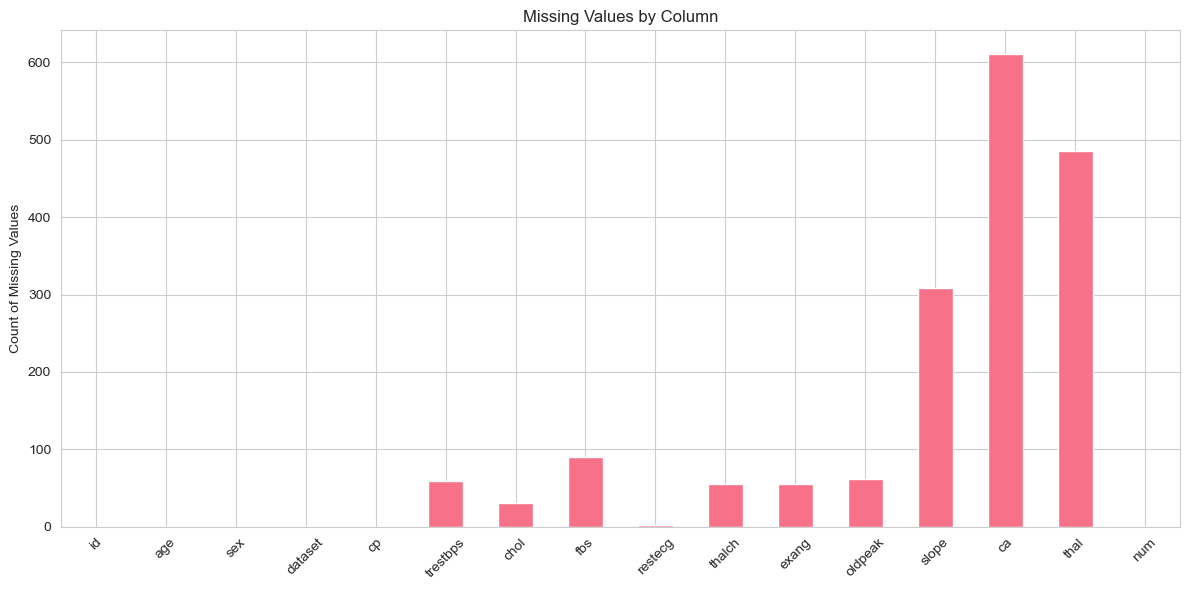

In [324]:
# ==================== MISSING VALUE ANALYSIS ====================
print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

missing_data = data.isnull().sum()
missing_percent = 100 * missing_data / len(data)
missing_table = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_table = missing_table[missing_table['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_table)
# Visualize missing data
plt.figure(figsize=(12, 6))
missing_data.plot(kind='bar')
plt.title('Missing Values by Column')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TARGET VARIABLE ANALYSIS
Target Variable Distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Target Variable Percentages:
num
0    44.673913
1    28.804348
2    11.847826
3    11.630435
4     3.043478
Name: proportion, dtype: float64


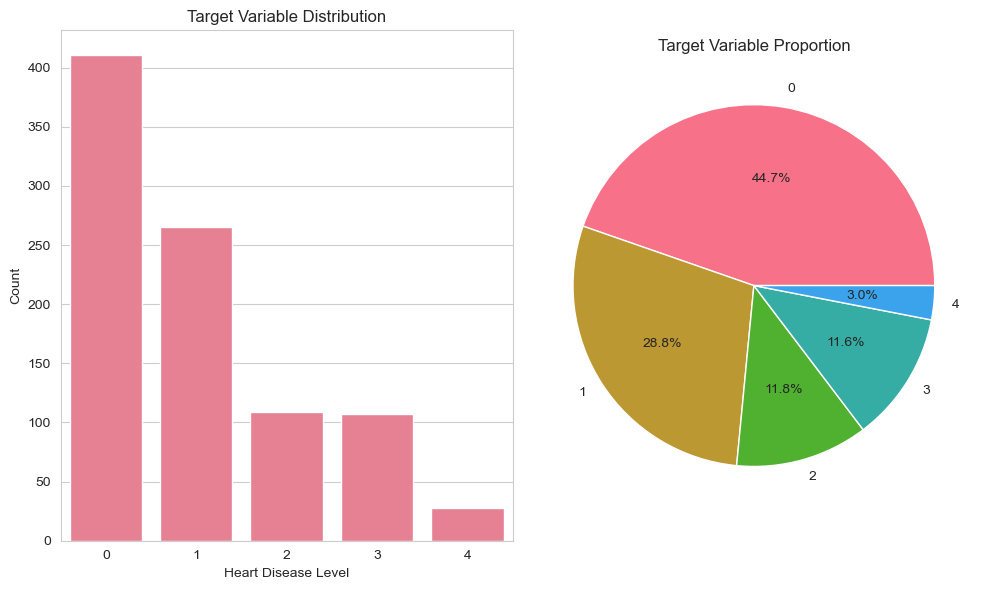

In [325]:
# ==================== TARGET VARIABLE ANALYSIS ====================
print("\n" + "="*50)
print("TARGET VARIABLE ANALYSIS")
print("="*50)

# Target variable distribution
target_counts = data['num'].value_counts().sort_index()
print("Target Variable Distribution:")
print(target_counts)
print(f"\nTarget Variable Percentages:")
print(data['num'].value_counts(normalize=True).sort_index() * 100)

# Plot target distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='num', data=data)
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Variable Proportion')
plt.tight_layout()
plt.show()


NUMERICAL FEATURES ANALYSIS
Numerical columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

Checking for anomalous values:
trestbps: 1 zero values (potentially invalid)
chol: 172 zero values (potentially invalid)


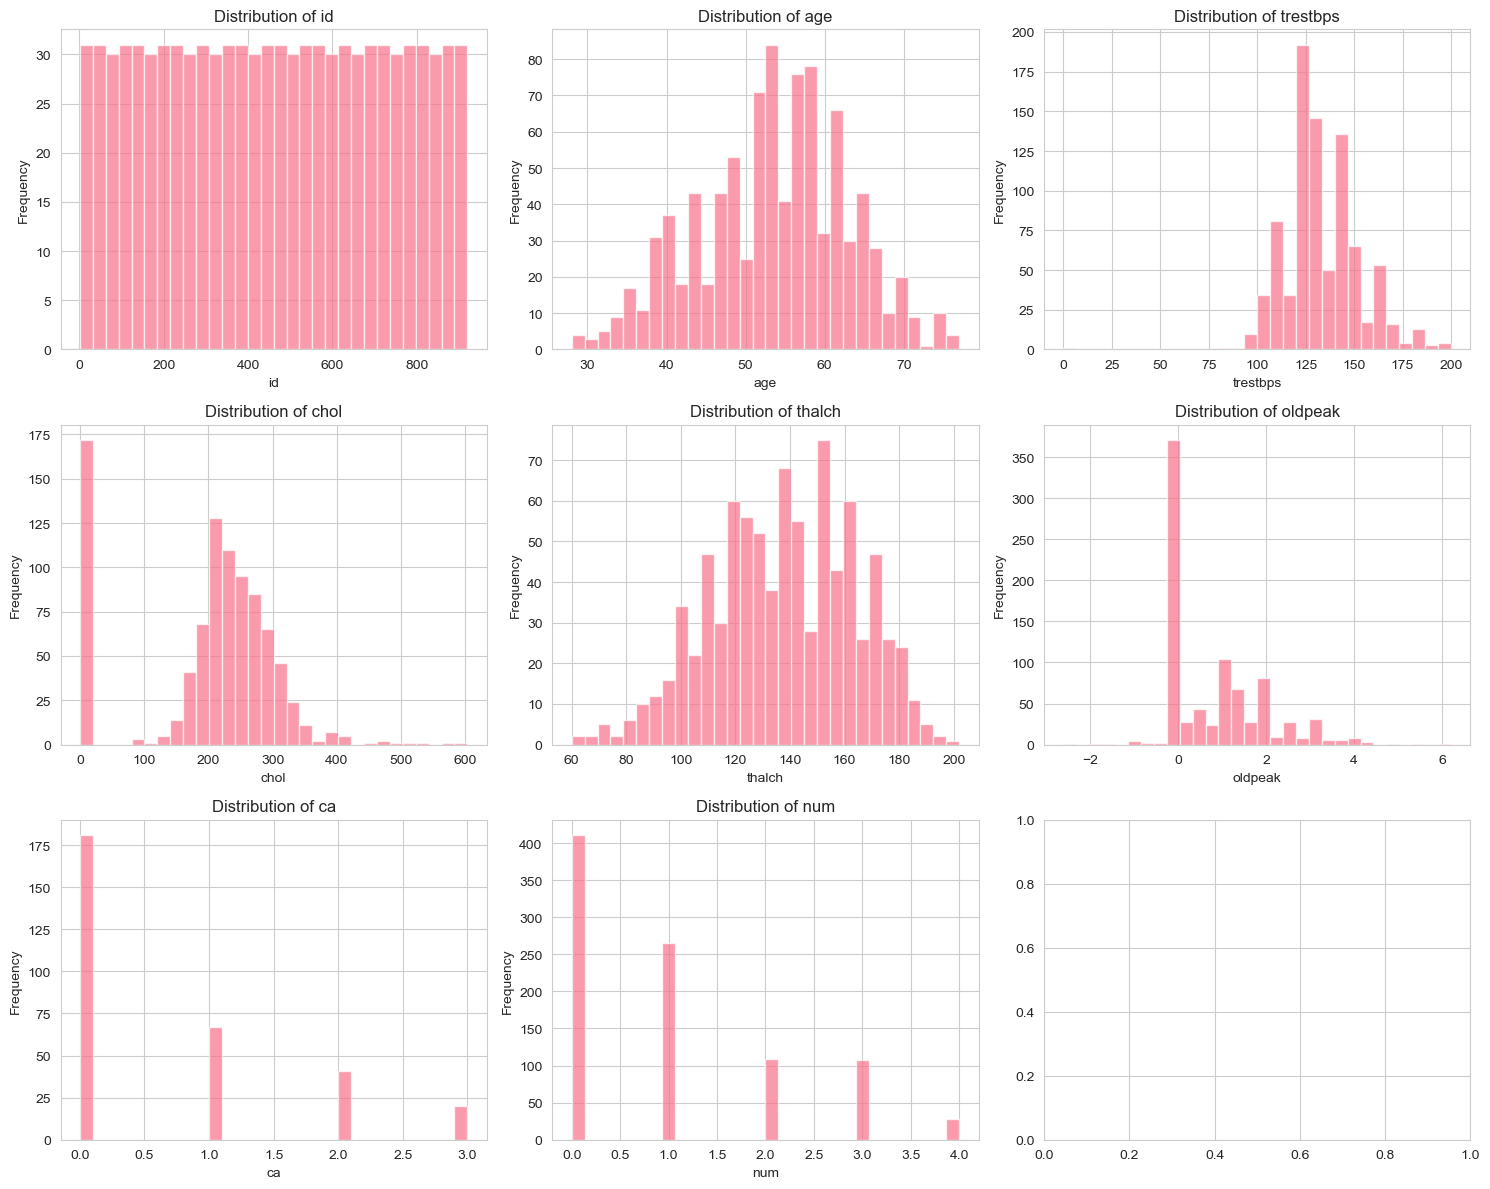

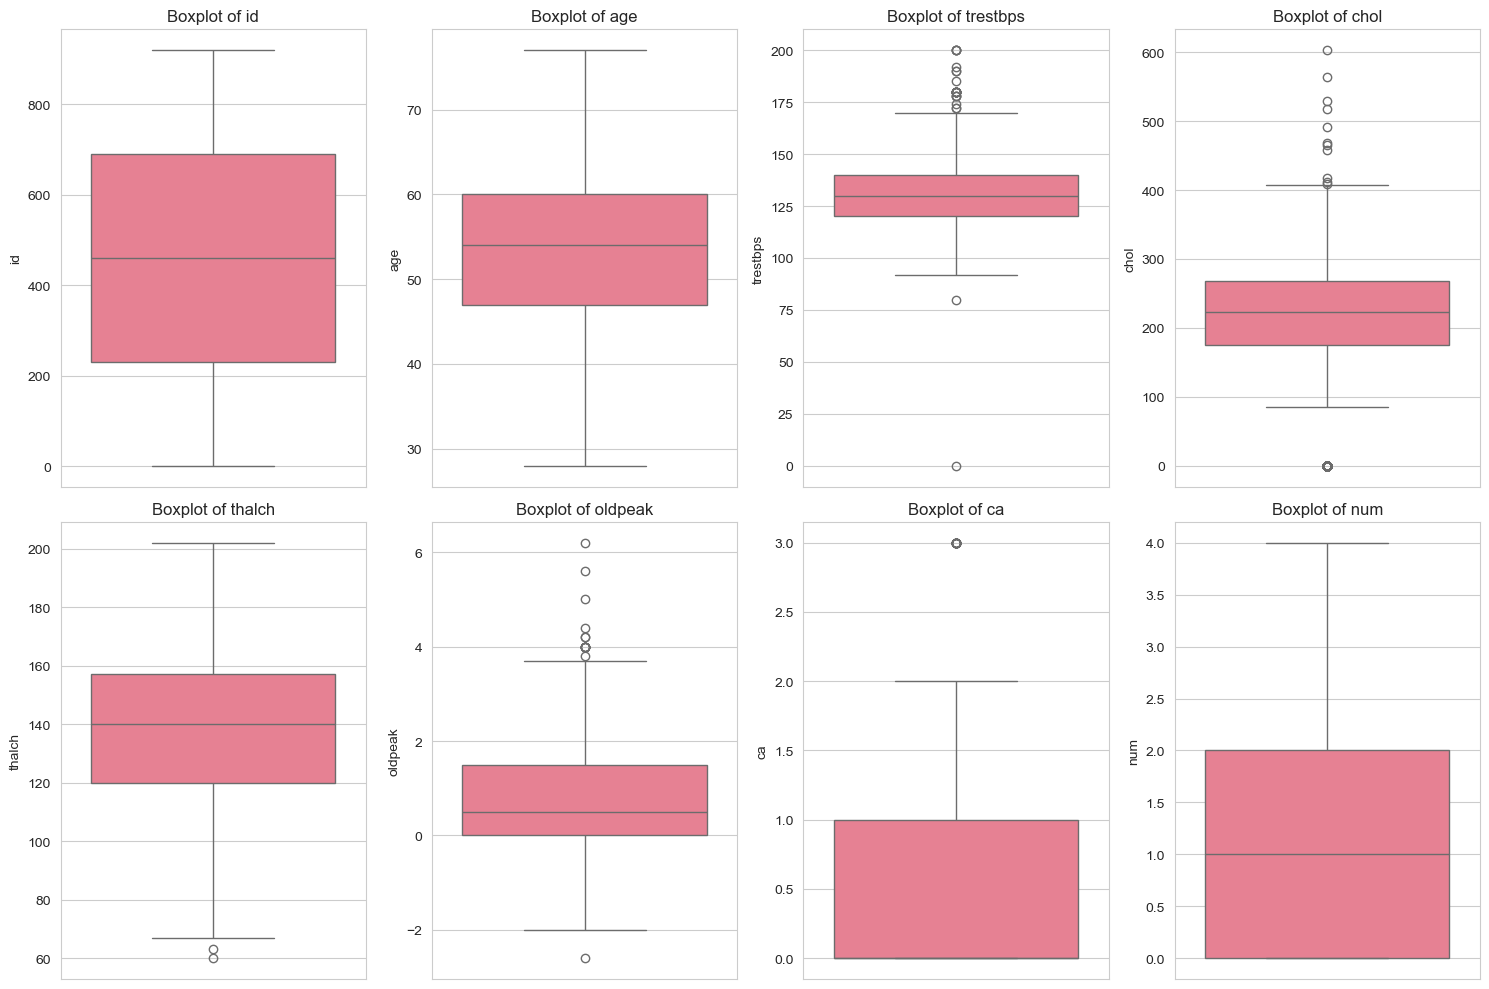

In [326]:
# ==================== NUMERICAL FEATURES ANALYSIS ====================
print("\n" + "="*50)
print("NUMERICAL FEATURES ANALYSIS")
print("="*50)

# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Check for anomalous values
print("\nChecking for anomalous values:")
for col in ['trestbps', 'chol']:
    zero_count = (data[col] == 0).sum()
    if zero_count > 0:
        print(f"{col}: {zero_count} zero values (potentially invalid)")

# Distribution plots for numerical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols[:9]):
    if col in data.columns:
        axes[i].hist(data[col].dropna(), bins=30, alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:8]):
    if col in data.columns:
        plt.subplot(2, 4, i+1)
        sns.boxplot(y=data[col])
        plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


CATEGORICAL FEATURES ANALYSIS
Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

sex value counts:
sex
Male      726
Female    194
Name: count, dtype: int64

dataset value counts:
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

cp value counts:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

fbs value counts:
fbs
False    692
True     138
Name: count, dtype: int64

restecg value counts:
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64

exang value counts:
exang
False    528
True     337
Name: count, dtype: int64

slope value counts:
slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

thal value counts:
thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


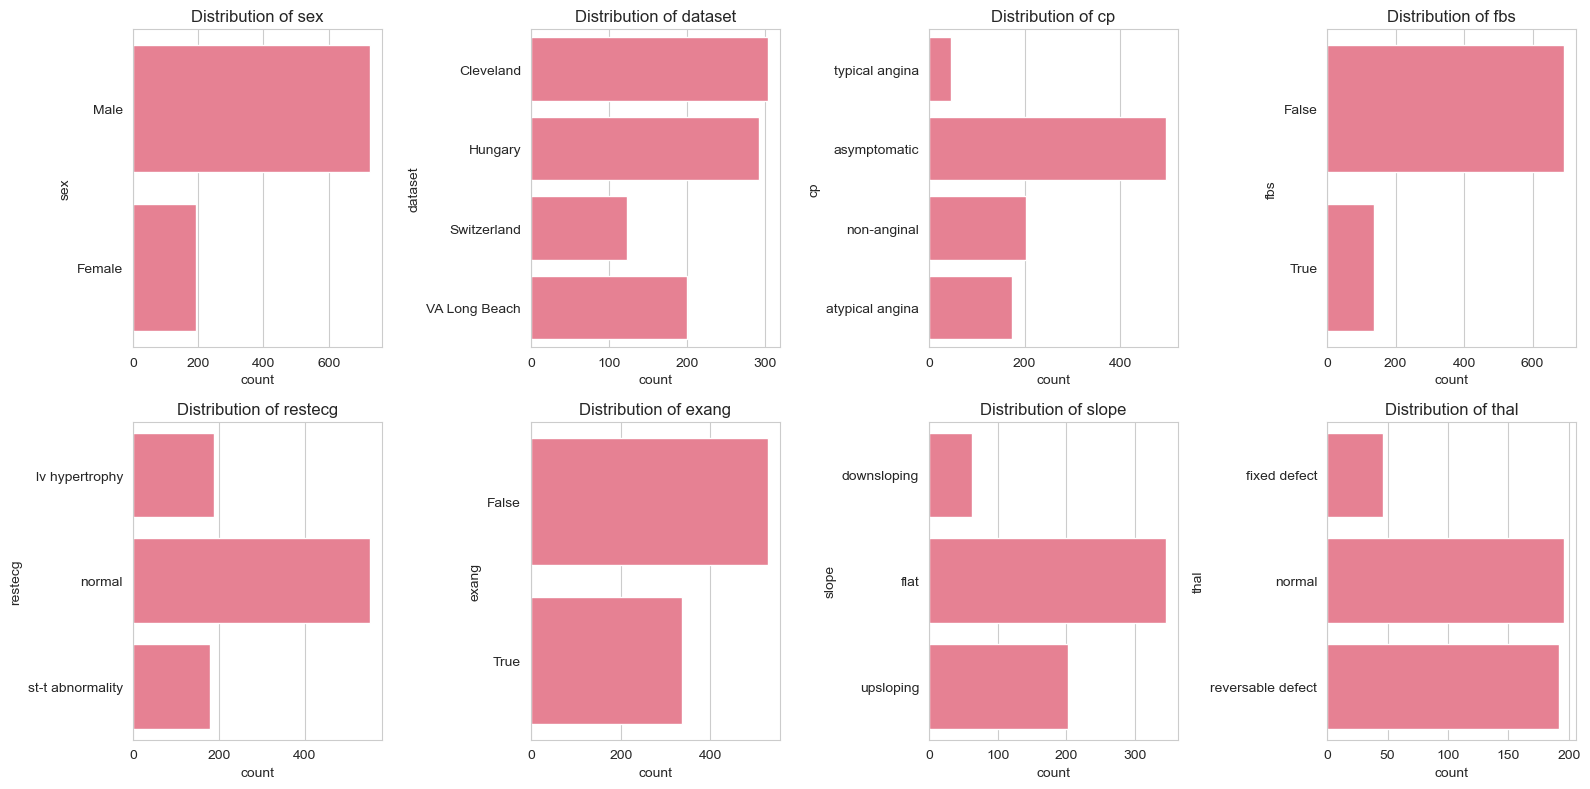

In [327]:
# ==================== CATEGORICAL FEATURES ANALYSIS ====================
print("\n" + "="*50)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*50)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Analyze each categorical feature
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(data[col].value_counts())

# Plot categorical distributions
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



CORRELATION ANALYSIS


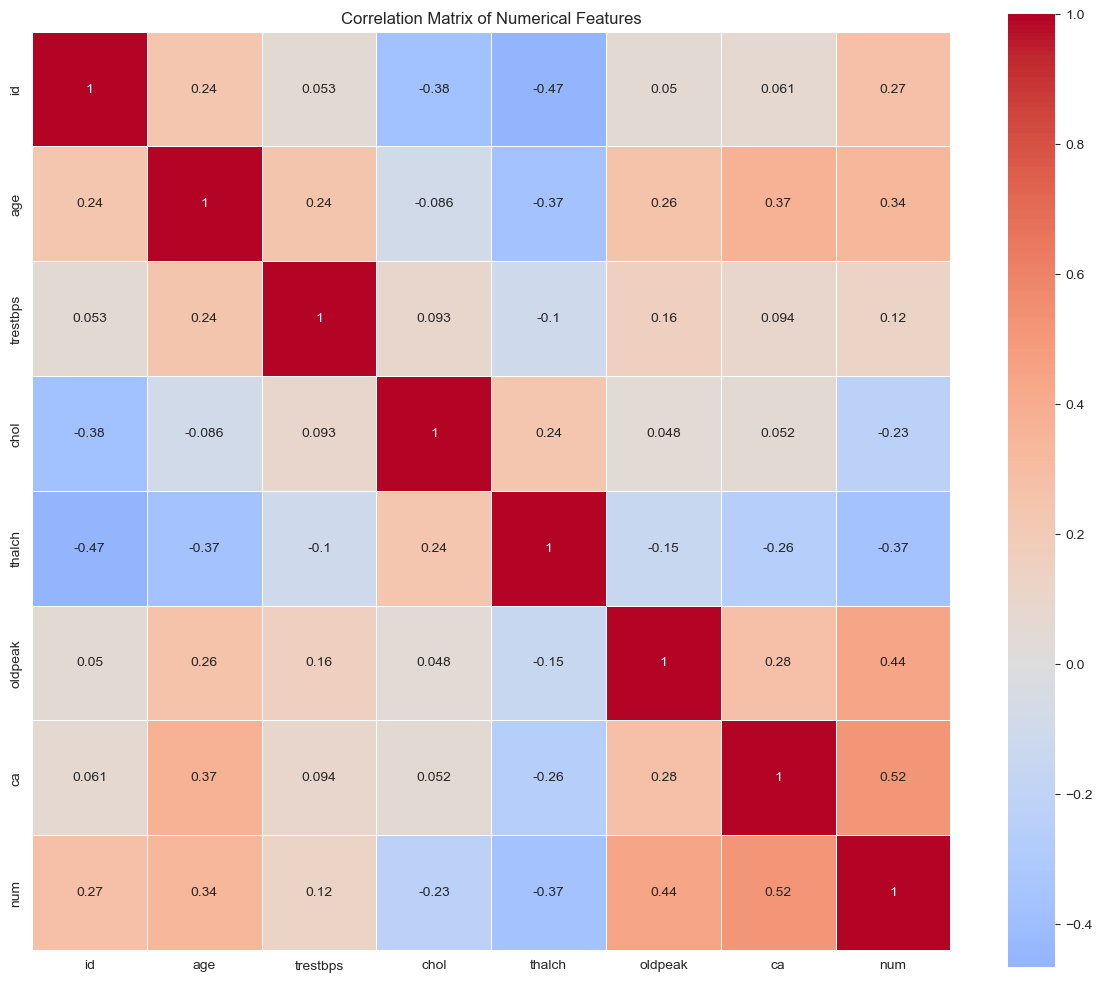

Highly correlated feature pairs (|correlation| > 0.5):
ca - num: 0.516


In [328]:
# ==================== CORRELATION ANALYSIS ====================
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Correlation matrix for numerical features
corr_matrix = data[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Find highly correlated features
print("Highly correlated feature pairs (|correlation| > 0.5):")
high_corr = np.where(np.abs(corr_matrix) > 0.5)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
                   for x, y in zip(*high_corr) if x != y and x < y]

for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")



FEATURE RELATIONSHIPS WITH TARGET


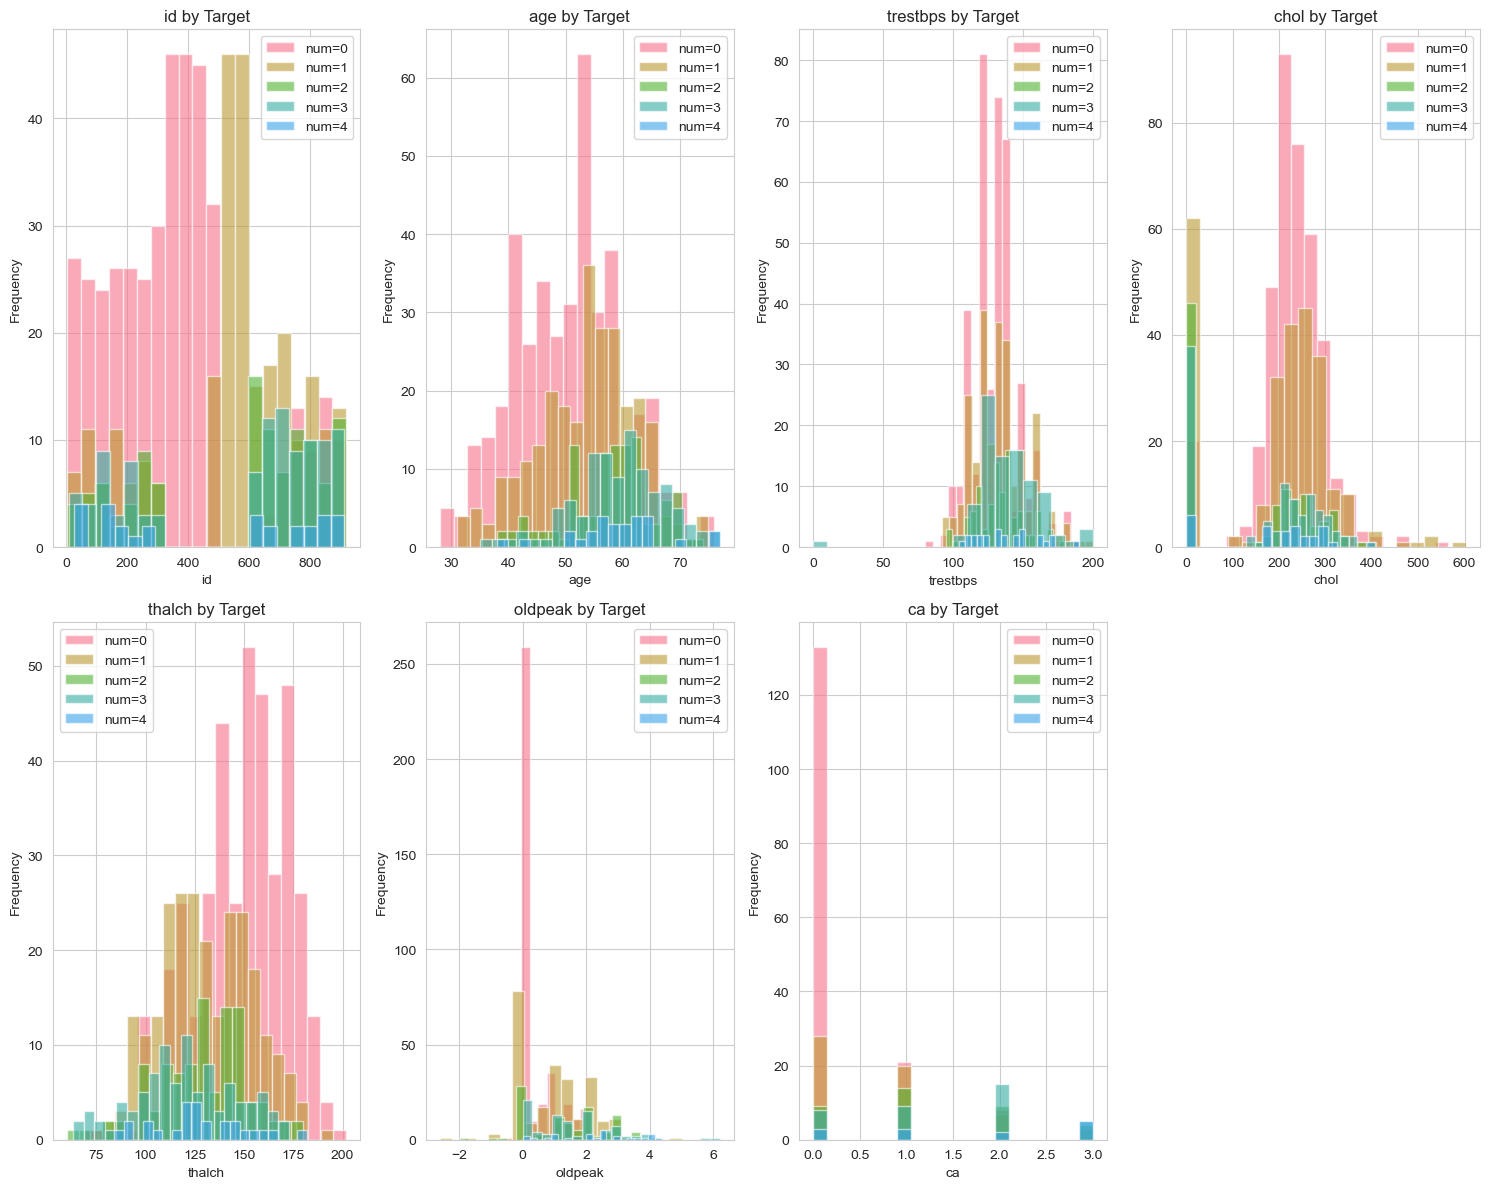


Categorical Features vs Target:

sex vs num:
num         0      1      2      3     4
sex                                     
Female  74.23  15.46   5.15   4.12  1.03
Male    36.78  32.37  13.64  13.64  3.58

dataset vs num:
num                0      1      2      3     4
dataset                                        
Cleveland      54.28  18.09  11.84  11.51  4.28
Hungary        63.82  36.18   0.00   0.00  0.00
Switzerland     6.50  39.02  26.02  24.39  4.07
VA Long Beach  25.50  28.00  20.50  21.00  5.00

cp vs num:
num                  0      1      2      3     4
cp                                               
asymptomatic     20.97  39.72  17.94  16.73  4.64
atypical angina  86.21  10.92   1.15   1.72  0.00
non-anginal      64.22  18.14   6.86   8.82  1.96
typical angina   56.52  26.09   8.70   6.52  2.17

fbs vs num:
num        0      1      2      3     4
fbs                                    
False  51.01  26.88   9.39   9.68  3.03
True   31.88  28.26  16.67  19.57  3.62


In [329]:
# ==================== FEATURE RELATIONSHIPS WITH TARGET ====================
print("\n" + "="*50)
print("FEATURE RELATIONSHIPS WITH TARGET")
print("="*50)

# Numerical features vs target
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols[:8]):
    if col != 'num' and col in data.columns:
        plt.subplot(2, 4, i+1)
        for target_val in sorted(data['num'].unique()):
            subset = data[data['num'] == target_val][col].dropna()
            plt.hist(subset, alpha=0.6, label=f'num={target_val}', bins=20)
        plt.title(f'{col} by Target')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()

plt.tight_layout()
plt.show()

# Categorical features vs target (cross-tabulation)
print("\nCategorical Features vs Target:")
for col in categorical_cols:
    if col != 'num':
        print(f"\n{col} vs num:")
        crosstab = pd.crosstab(data[col], data['num'], normalize='index') * 100
        print(crosstab.round(2))

In [330]:
# ==================== DATA QUALITY ASSESSMENT ====================
print("\n" + "="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check data types
print("\nData types:")
print(data.dtypes)

# Check unique values for low cardinality features
print("\nUnique values count for each column:")
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} unique values")



DATA QUALITY ASSESSMENT
Number of duplicate rows: 0

Data types:
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Unique values count for each column:
id: 920 unique values
age: 50 unique values
sex: 2 unique values
dataset: 4 unique values
cp: 4 unique values
trestbps: 61 unique values
chol: 217 unique values
fbs: 2 unique values
restecg: 3 unique values
thalch: 119 unique values
exang: 2 unique values
oldpeak: 53 unique values
slope: 3 unique values
ca: 4 unique values
thal: 3 unique values
num: 5 unique values


In [331]:
# ==================== OUTLIER DETECTION ====================
print("\n" + "="*50)
print("OUTLIER DETECTION (IQR METHOD)")
print("="*50)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers for key numerical features
outlier_summary = {}
for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']:
    if col in data.columns:
        outliers, lower, upper = detect_outliers_iqr(data, col)
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': len(outliers) / len(data) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")



OUTLIER DETECTION (IQR METHOD)
age: 0 outliers (0.00%)
trestbps: 28 outliers (3.04%)
chol: 183 outliers (19.89%)
thalch: 2 outliers (0.22%)
oldpeak: 16 outliers (1.74%)


In [332]:
# ==================== PREPROCESSING RECOMMENDATIONS ====================
print("\n" + "="*50)
print("PREPROCESSING RECOMMENDATIONS")
print("="*50)

recommendations = []

# Missing data recommendations
if missing_table.shape[0] > 0:
    high_missing = missing_table[missing_table['Missing Percentage'] > 50]
    if len(high_missing) > 0:
        recommendations.append("• Consider dropping features with >50% missing data or advanced imputation")
    
    medium_missing = missing_table[(missing_table['Missing Percentage'] > 10) & 
                                   (missing_table['Missing Percentage'] <= 50)]
    if len(medium_missing) > 0:
        recommendations.append("• Use appropriate imputation for features with 10-50% missing data")

# Anomalous values
zero_bp = (data['trestbps'] == 0).sum() if 'trestbps' in data.columns else 0
zero_chol = (data['chol'] == 0).sum() if 'chol' in data.columns else 0

if zero_bp > 0 or zero_chol > 0:
    recommendations.append("• Replace zero values in trestbps and chol with NaN, then impute")

# Encoding recommendations
recommendations.append("• One-hot encode nominal categorical features (sex, dataset, restecg, thal)")
recommendations.append("• Consider ordinal encoding for cp and slope if order matters")
recommendations.append("• Convert boolean features (fbs, exang) to 0/1")

# Scaling recommendations
recommendations.append("• Apply standardization/normalization to numerical features")

# Target variable recommendations
if data['num'].nunique() > 2:
    recommendations.append("• Consider converting target to binary (0 vs 1-4) for better balance")

# Class imbalance
target_imbalance = data['num'].value_counts().min() / data['num'].value_counts().max()
if target_imbalance < 0.5:
    recommendations.append("• Address class imbalance using SMOTE or class weights")

print("Recommendations:")
for rec in recommendations:
    print(rec)

# ==================== SUMMARY STATISTICS ====================
print("\n" + "="*50)
print("DATASET SUMMARY")
print("="*50)
print(f"• Total samples: {len(data)}")
print(f"• Total features: {len(data.columns)}")
print(f"• Numerical features: {len(numerical_cols)}")
print(f"• Categorical features: {len(categorical_cols)}")
print(f"• Missing values: {data.isnull().sum().sum()} ({data.isnull().sum().sum()/data.size*100:.2f}%)")
print(f"• Target classes: {data['num'].nunique()}")
print(f"• Most frequent class: {data['num'].mode()[0]} ({data['num'].value_counts().iloc[0]/len(data)*100:.1f}%)")

print("\n" + "="*50)
print("EDA COMPLETED!")
print("="*50)


PREPROCESSING RECOMMENDATIONS
Recommendations:
• Consider dropping features with >50% missing data or advanced imputation
• Use appropriate imputation for features with 10-50% missing data
• Replace zero values in trestbps and chol with NaN, then impute
• One-hot encode nominal categorical features (sex, dataset, restecg, thal)
• Consider ordinal encoding for cp and slope if order matters
• Convert boolean features (fbs, exang) to 0/1
• Apply standardization/normalization to numerical features
• Consider converting target to binary (0 vs 1-4) for better balance
• Address class imbalance using SMOTE or class weights

DATASET SUMMARY
• Total samples: 920
• Total features: 16
• Numerical features: 8
• Categorical features: 8
• Missing values: 1759 (11.95%)
• Target classes: 5
• Most frequent class: 0 (44.7%)

EDA COMPLETED!


In [333]:
# Replace zero values in trestbps and chol with NaN for proper imputation
data['trestbps'] = data['trestbps'].replace(0, np.nan)
data['chol'] = data['chol'].replace(0, np.nan)

print("Zero values replaced with NaN:")
print(f"Missing values in trestbps: {data['trestbps'].isnull().sum()}")
print(f"Missing values in chol: {data['chol'].isnull().sum()}")


Zero values replaced with NaN:
Missing values in trestbps: 60
Missing values in chol: 202


In [334]:
# Impute numerical features with median
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
num_imputer = SimpleImputer(strategy='median')
data[num_features] = num_imputer.fit_transform(data[num_features])

print("Numerical features imputed with median")
print(f"Missing values after imputation: {data[num_features].isnull().sum().sum()}")


Numerical features imputed with median
Missing values after imputation: 0


In [335]:
# Impute categorical features with most frequent
cat_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_features] = cat_imputer.fit_transform(data[cat_features])

print("Categorical features imputed with most frequent")
print(f"Missing values after imputation: {data[cat_features].isnull().sum().sum()}")


Categorical features imputed with most frequent
Missing values after imputation: 0


In [336]:
# Convert boolean features to 0/1
bool_map = {'TRUE': 1, 'FALSE': 0, True: 1, False: 0, 'true': 1, 'false': 0}

data['fbs'] = data['fbs'].map(bool_map).fillna(data['fbs'])
data['fbs'] = data['fbs'].astype(int)

data['exang'] = data['exang'].map(bool_map).fillna(data['exang'])
data['exang'] = data['exang'].astype(int)

print("Boolean features converted to 0/1:")
print(f"fbs unique values: {data['fbs'].unique()}")
print(f"exang unique values: {data['exang'].unique()}")


Boolean features converted to 0/1:
fbs unique values: [1 0]
exang unique values: [0 1]


In [337]:
# One-hot encode nominal categorical features
nominal_features = ['sex', 'dataset', 'restecg', 'thal']

print("Before one-hot encoding shape:", data.shape)
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)
print("After one-hot encoding shape:", data.shape)

# Show new columns created
new_cols = [col for col in data.columns if any(feat in col for feat in nominal_features)]
print(f"New one-hot encoded columns: {new_cols}")


Before one-hot encoding shape: (920, 16)
After one-hot encoding shape: (920, 20)
New one-hot encoded columns: ['thalch', 'sex_Male', 'dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'restecg_normal', 'restecg_st-t abnormality', 'thal_normal', 'thal_reversable defect']


In [338]:
# Ordinal encoding for cp (chest pain type) - ordered by severity
cp_order = ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina']

print("Original cp values:", data['cp'].unique())

try:
    cp_encoder = OrdinalEncoder(categories=[cp_order], handle_unknown='use_encoded_value', unknown_value=-1)
    data['cp'] = cp_encoder.fit_transform(data[['cp']]).astype(int)
    print("CP encoded with ordinal encoding:", data['cp'].unique())
except:
    # Fallback to simple categorical codes
    data['cp'] = pd.Categorical(data['cp']).codes
    print("CP encoded with categorical codes (fallback):", data['cp'].unique())


Original cp values: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
CP encoded with ordinal encoding: [3 0 1 2]


In [339]:
# Ordinal encoding for slope - ordered by severity
slope_order = ['upsloping', 'flat', 'downsloping']

print("Original slope values:", data['slope'].unique())

try:
    slope_encoder = OrdinalEncoder(categories=[slope_order], handle_unknown='use_encoded_value', unknown_value=-1)
    data['slope'] = slope_encoder.fit_transform(data[['slope']]).astype(int)
    print("Slope encoded with ordinal encoding:", data['slope'].unique())
except:
    # Fallback to simple categorical codes
    data['slope'] = pd.Categorical(data['slope']).codes
    print("Slope encoded with categorical codes (fallback):", data['slope'].unique())


Original slope values: ['downsloping' 'flat' 'upsloping']
Slope encoded with ordinal encoding: [2 1 0]


In [340]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils.class_weight import compute_class_weight

In [341]:
# Standardize numerical features
scaler = StandardScaler()
data[num_features] = scaler.fit_transform(data[num_features])

print("Numerical features standardized")
print("Sample statistics after standardization:")
print(data[num_features].describe())


Numerical features standardized
Sample statistics after standardization:
                age      trestbps          chol        thalch       oldpeak  \
count  9.200000e+02  9.200000e+02  9.200000e+02  9.200000e+02  9.200000e+02   
mean   6.178632e-17 -3.552714e-16 -1.660507e-16 -4.016111e-16 -2.316987e-17   
std    1.000544e+00  1.000544e+00  1.000544e+00  1.000544e+00  1.000544e+00   
min   -2.708286e+00 -2.909426e+00 -3.095664e+00 -3.091427e+00 -3.265577e+00   
25%   -6.912073e-01 -6.772850e-01 -5.308023e-01 -7.039908e-01 -8.068863e-01   
50%    5.192709e-02 -1.192497e-01 -1.105707e-01  9.182113e-02 -3.340612e-01   
75%    6.888994e-01  4.387856e-01  4.207566e-01  7.284707e-01  6.115890e-01   
max    2.493654e+00  3.786997e+00  6.912610e+00  2.558838e+00  5.056145e+00   

                 ca  
count  9.200000e+02  
mean   6.178632e-17  
std    1.000544e+00  
min   -3.613997e-01  
25%   -3.613997e-01  
50%   -3.613997e-01  
75%   -3.613997e-01  
max    4.411152e+00  


In [342]:
# Convert target to binary (0 vs 1-4)
print("Original target distribution:")
print(data['num'].value_counts().sort_index())

data['target_binary'] = data['num'].apply(lambda x: 0 if x == 0 else 1)

print("\nBinary target distribution:")
print(data['target_binary'].value_counts().sort_index())

# Calculate class imbalance ratio
class_counts = data['target_binary'].value_counts()
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"\nImbalance ratio: {imbalance_ratio:.3f}")


Original target distribution:
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Binary target distribution:
target_binary
0    411
1    509
Name: count, dtype: int64

Imbalance ratio: 0.807


In [343]:
# Calculate class weights for handling imbalance
y = data['target_binary']
classes = np.unique(y)
class_weights = compute_class_weight('balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

print(f"Class weights for balancing: {class_weight_dict}")


Class weights for balancing: {0: 1.119221411192214, 1: 0.9037328094302554}


In [344]:
# Simple oversampling to balance classes
majority_class = data[data['target_binary'] == class_counts.idxmax()]
minority_class = data[data['target_binary'] == class_counts.idxmin()]

print(f"Majority class size: {len(majority_class)}")
print(f"Minority class size: {len(minority_class)}")

# Oversample minority class
minority_oversampled = minority_class.sample(
    n=len(majority_class), 
    replace=True, 
    random_state=42
)

# Combine to create balanced dataset
balanced_data = pd.concat([majority_class, minority_oversampled], ignore_index=True)

print(f"\nBalanced dataset shape: {balanced_data.shape}")
print("Balanced target distribution:")
print(balanced_data['target_binary'].value_counts().sort_index())


Majority class size: 509
Minority class size: 411

Balanced dataset shape: (1018, 21)
Balanced target distribution:
target_binary
0    509
1    509
Name: count, dtype: int64


In [345]:
# Prepare final features and target
feature_cols = [col for col in balanced_data.columns if col not in ['num', 'target_binary', 'id']]
X = balanced_data[feature_cols]
y = balanced_data['target_binary']

print(f"Final features shape: {X.shape}")
print(f"Final target shape: {y.shape}")
print(f"\nFeature columns ({len(feature_cols)}):")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2}. {col}")


Final features shape: (1018, 18)
Final target shape: (1018,)

Feature columns (18):
 1. age
 2. cp
 3. trestbps
 4. chol
 5. fbs
 6. thalch
 7. exang
 8. oldpeak
 9. slope
10. ca
11. sex_Male
12. dataset_Hungary
13. dataset_Switzerland
14. dataset_VA Long Beach
15. restecg_normal
16. restecg_st-t abnormality
17. thal_normal
18. thal_reversable defect


In [346]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

print(f"\nTraining set class distribution:")
print(y_train.value_counts().sort_index())

print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())


Training set shape: (814, 18)
Test set shape: (204, 18)

Training set class distribution:
target_binary
0    407
1    407
Name: count, dtype: int64

Test set class distribution:
target_binary
0    102
1    102
Name: count, dtype: int64


In [347]:
# Final summary
print("="*60)
print("PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*60)

print(f"Original dataset shape: {data.shape}")
print(f"Processed dataset shape: {balanced_data.shape}")
print(f"Number of features: {X.shape[1]}")

print(f"\nMissing values in final dataset: {balanced_data.isnull().sum().sum()}")

print(f"\nData types in final dataset:")
print(balanced_data.dtypes.value_counts())

print(f"\nTarget variable summary:")
print(f"Binary classification: 0 (No Disease) vs 1 (Disease)")
print(f"Class balance achieved through oversampling")

print(f"\nDataset is ready for machine learning!")


PREPROCESSING COMPLETED SUCCESSFULLY!
Original dataset shape: (920, 21)
Processed dataset shape: (1018, 21)
Number of features: 18

Missing values in final dataset: 0

Data types in final dataset:
bool       8
float64    6
int32      4
int64      3
Name: count, dtype: int64

Target variable summary:
Binary classification: 0 (No Disease) vs 1 (Disease)
Class balance achieved through oversampling

Dataset is ready for machine learning!


In [348]:
# Save the processed data
balanced_data.to_csv('heart_disease_processed.csv', index=False)
print("Processed data saved as 'heart_disease_processed.csv'")

# Also save train/test splits
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('heart_disease_train.csv', index=False)
test_data.to_csv('heart_disease_test.csv', index=False)

print("Train data saved as 'heart_disease_train.csv'")
print("Test data saved as 'heart_disease_test.csv'")


Processed data saved as 'heart_disease_processed.csv'


Train data saved as 'heart_disease_train.csv'
Test data saved as 'heart_disease_test.csv'


In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

In [350]:
lr = LogisticRegression(random_state=42)
svm = svm.SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [351]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [352]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [353]:
svm.fit(X_train,y_train)

SVC()

In [354]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [355]:
y_pred_lr = lr.predict(X_test) 
y_pred_rf = rf.predict(X_test) 
y_pred_svm = svm.predict(X_test) 
y_pred_k_neigbors = knn.predict(X_test) 

In [356]:
print("\n ---- Logistic Regression ------")
print(classification_report(y_pred_lr,y_test,zero_division=0))

print("\n ---- Random Forest  ------")
print(classification_report(y_pred_rf,y_test,zero_division=0))

print("\n ----  SVM ------")
print(classification_report(y_pred_svm,y_test,zero_division=0))

print("\n ---- K Nearest Neigbors ------")
print(classification_report(y_pred_k_neigbors,y_test,zero_division=0))


 ---- Logistic Regression ------
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       109
           1       0.77      0.83      0.80        95

    accuracy                           0.81       204
   macro avg       0.81      0.81      0.81       204
weighted avg       0.81      0.81      0.81       204


 ---- Random Forest  ------
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       121
           1       0.77      0.95      0.85        83

    accuracy                           0.87       204
   macro avg       0.87      0.88      0.87       204
weighted avg       0.88      0.87      0.87       204


 ----  SVM ------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.78      0.84      0.81        95

    accuracy                           0.82       204
   macro avg       0.82      0.82      0.82   

In [357]:
print("\n ---- Logistic Regression ------")
print(accuracy_score(y_pred_lr,y_test))

print("\n ---- Random Forest  ------")
print(accuracy_score(y_pred_rf,y_test))

print("\n ----  SVM ------")
print(accuracy_score(y_pred_svm,y_test))

print("\n ---- K Nearest Neigbors ------")
print(accuracy_score(y_pred_k_neigbors,y_test))


 ---- Logistic Regression ------
0.8088235294117647

 ---- Random Forest  ------
0.8676470588235294

 ----  SVM ------
0.8186274509803921

 ---- K Nearest Neigbors ------
0.7990196078431373


In [358]:
# Create a manually preprocessed version
print("Manual Preprocessing Implementation:")
print("=" * 50)

# Create a copy for preprocessing
processed_data = data.copy()

# 1. Replace zero values with median manually
trestbps_median = processed_data[processed_data['trestbps'] > 0]['trestbps'].median()
chol_median = processed_data[processed_data['chol'] > 0]['chol'].median()

processed_data.loc[processed_data['trestbps'] == 0, 'trestbps'] = trestbps_median
processed_data.loc[processed_data['chol'] == 0, 'chol'] = chol_median

print(f"Replaced {(data['trestbps'] == 0).sum()} zero trestbps values with {trestbps_median}")
print(f"Replaced {(data['chol'] == 0).sum()} zero chol values with {chol_median}")

# 2. Handle missing values manually
for col in processed_data.columns:
    if processed_data[col].dtype in ['float64', 'int64']:
        # Use median for numerical
        if processed_data[col].isnull().sum() > 0:
            median_val = processed_data[col].median()
            processed_data[col].fillna(median_val, inplace=True)
            print(f"Filled {col} missing values with median: {median_val}")
    else:
        # Use mode for categorical
        if processed_data[col].isnull().sum() > 0:
            mode_val = processed_data[col].mode()[0]
            processed_data[col].fillna(mode_val, inplace=True)
            print(f"Filled {col} missing values with mode: {mode_val}")

# 3. Convert boolean columns manually
bool_mapping = {'TRUE': 1, 'FALSE': 0, True: 1, False: 0}
processed_data['fbs'] = processed_data['fbs'].map(bool_mapping).astype(int)
processed_data['exang'] = processed_data['exang'].map(bool_mapping).astype(int)

# 4. Create binary target
processed_data['target_binary'] = (processed_data['num'] > 0).astype(int)

print(f"\nFinal processed data shape: {processed_data.shape}")
print(f"Missing values remaining: {processed_data.isnull().sum().sum()}")

# Save the manually processed data
processed_data.to_csv('heart_disease_manually_processed.csv', index=False)
print("Manually processed data saved to 'heart_disease_manually_processed.csv'")


Manual Preprocessing Implementation:
Replaced 0 zero trestbps values with 0.717803212204533
Replaced 0 zero chol values with 0.7105714983925124

Final processed data shape: (920, 21)
Missing values remaining: 0
Manually processed data saved to 'heart_disease_manually_processed.csv'


In [359]:
X = processed_data.drop('num',axis=1)
y = processed_data['num']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [360]:
from sklearn import svm
lr = LogisticRegression(random_state=42)
svm = svm.SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [361]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
svm.fit(X_train,y_train)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [362]:
y_pred_lr = lr.predict(X_test) 
y_pred_rf = rf.predict(X_test) 
y_pred_svm = svm.predict(X_test) 
y_pred_k_neigbors = knn.predict(X_test) 

In [363]:
print("\n ---- Logistic Regression ------")
print(classification_report(y_pred_lr,y_test,zero_division=0))

print("\n ---- Random Forest  ------")
print(classification_report(y_pred_rf,y_test,zero_division=0))

print("\n ----  SVM ------")
print(classification_report(y_pred_svm,y_test,zero_division=0))

print("\n ---- K Nearest Neigbors ------")
print(classification_report(y_pred_k_neigbors,y_test,zero_division=0))


 ---- Logistic Regression ------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       0.79      0.66      0.72        64
           2       0.27      0.33      0.30        18
           3       0.19      0.21      0.20        19
           4       0.17      0.33      0.22         3

    accuracy                           0.72       184
   macro avg       0.48      0.51      0.49       184
weighted avg       0.75      0.72      0.73       184


 ---- Random Forest  ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.81      0.69      0.75        62
           2       0.23      0.26      0.24        19
           3       0.29      0.30      0.29        20
           4       0.00      0.00      0.00         1

    accuracy                           0.74       184
   macro avg       0.46      0.45      0.46       184
weighted avg  

In [364]:
print("\n ---- Logistic Regression ------")
print(accuracy_score(y_pred_lr,y_test))

print("\n ---- Random Forest  ------")
print(accuracy_score(y_pred_rf,y_test))

print("\n ----  SVM ------")
print(accuracy_score(y_pred_svm,y_test))

print("\n ---- K Nearest Neigbors ------")
print(accuracy_score(y_pred_k_neigbors,y_test))


 ---- Logistic Regression ------
0.7228260869565217

 ---- Random Forest  ------
0.7391304347826086

 ----  SVM ------
0.6195652173913043

 ---- K Nearest Neigbors ------
0.6195652173913043
